In [106]:
import cv2
import matplotlib.pyplot as plt

In [107]:
img_inf = cv2.imread('../Hackathon/Ultasonic/data/train/infected/img1.jpg')
img_inf = cv2.cvtColor(img_inf,cv2.COLOR_BGR2RGB)

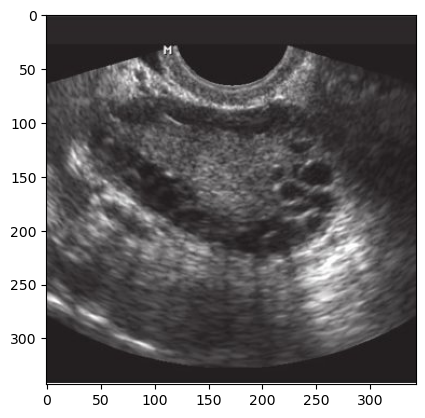

In [108]:
plt.imshow(img_inf)

In [109]:
img_nf = cv2.imread('../Hackathon/Ultasonic/data/train/notinfected/img3.jpg')
img_nf = cv2.cvtColor(img_nf,cv2.COLOR_BGR2RGB)

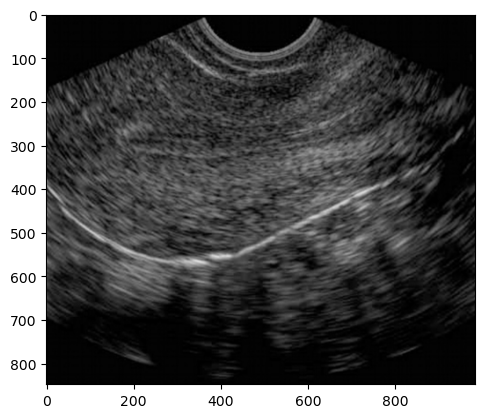

In [110]:
plt.imshow(img_nf)

In [111]:
from keras.preprocessing.image import ImageDataGenerator

In [112]:
image_gen = ImageDataGenerator(rotation_range=30, 
                               width_shift_range=0.1, 
                               height_shift_range=0.1, 
                               rescale=1/255,
                               shear_range=0.2, 
                               zoom_range=0.2, 
                               horizontal_flip=True,
                               fill_mode='nearest' 
                              )

In [113]:
image_gen.flow_from_directory('../Hackathon/Ultasonic/data/train/')

Found 1924 images belonging to 2 classes.


In [114]:
image_gen.flow_from_directory('../Hackathon/Ultasonic/data/test/')

Found 1922 images belonging to 2 classes.


In [115]:
image_shape = (120,120,3)

In [116]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [117]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(120,120,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(120,120,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(120,120,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [118]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 118, 118, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 59, 59, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 57, 57, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 26, 26, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 10816)            

In [119]:
batch_size = 7

train_image_gen = image_gen.flow_from_directory('../Hackathon/Ultasonic/data/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 1924 images belonging to 2 classes.


In [120]:
test_image_gen = image_gen.flow_from_directory('../Hackathon/Ultasonic/data/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 1922 images belonging to 2 classes.


In [121]:
train_image_gen.class_indices

{'infected': 0, 'notinfected': 1}

In [122]:
import warnings
warnings.filterwarnings('ignore')

In [123]:
results = model.fit_generator(train_image_gen,epochs=10,
                              validation_data=test_image_gen,
                             validation_steps=16)

Epoch 1/10
275/275 [==============================] - 26s 90ms/step - loss: 0.3533 - accuracy: 0.8443 - val_loss: 0.0156 - val_accuracy: 0.9911
Epoch 2/10
275/275 [==============================] - 24s 87ms/step - loss: 0.0405 - accuracy: 0.9932 - val_loss: 7.8948e-04 - val_accuracy: 1.0000
Epoch 3/10
275/275 [==============================] - 24s 87ms/step - loss: 0.0292 - accuracy: 0.9926 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 4/10
275/275 [==============================] - 25s 90ms/step - loss: 0.0230 - accuracy: 0.9937 - val_loss: 6.2453e-04 - val_accuracy: 1.0000
Epoch 5/10
275/275 [==============================] - 25s 92ms/step - loss: 0.0041 - accuracy: 0.9985 - val_loss: 0.0088 - val_accuracy: 1.0000
Epoch 6/10
275/275 [==============================] - 25s 91ms/step - loss: 0.0339 - accuracy: 0.9888 - val_loss: 2.4836e-04 - val_accuracy: 1.0000
Epoch 7/10
275/275 [==============================] - 25s 90ms/step - loss: 0.0209 - accuracy: 0.9962 - val_loss: 0.0019 - v

In [ ]:
results

In [125]:
results.history

{'loss': [0.18511846661567688,
  0.026006532832980156,
  0.02570571005344391,
  0.01655491441488266,
  0.01657422073185444,
  0.0409955196082592,
  0.02705320343375206,
  0.006244056858122349,
  0.0018849127227440476,
  0.006672707851976156],
 'accuracy': [0.9282744526863098,
  0.9916840195655823,
  0.9922037124633789,
  0.9958419799804688,
  0.9948024749755859,
  0.9864864945411682,
  0.9942827224731445,
  0.9984407424926758,
  0.9989604949951172,
  0.9968814849853516],
 'val_loss': [0.015557902865111828,
  0.0007894776063039899,
  0.007046567741781473,
  0.0006245289114303887,
  0.00877444725483656,
  0.0002483584394212812,
  0.0018789845053106546,
  5.443363534141099e-06,
  1.932956547534559e-05,
  0.00021478279086295515],
 'val_accuracy': [0.9910714030265808,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0]}

In [126]:
train_image_gen.class_indices

{'infected': 0, 'notinfected': 1}

In [159]:
import numpy as np
from keras.preprocessing import image

file = '../Hackathon/Ultasonic/data/test/infected/img5.jpg'
check = cv2.imread(file)
check = cv2.cvtColor(img_inf,cv2.COLOR_BGR2RGB)

img = image.load_img(file, target_size=(120, 120))

img = image.img_to_array(img)

img = np.expand_dims(img, axis=0)
img = img/255

In [160]:
r=model.predict_classes(img)
if r==0:
    text='infected'
else:
    text='notinfected'

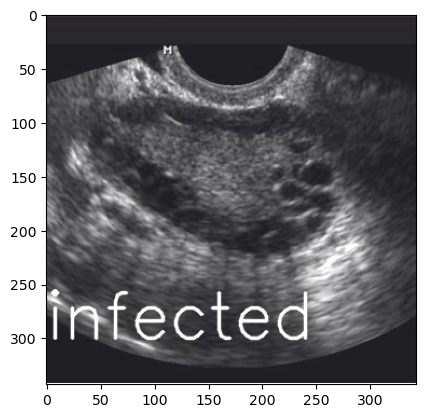

In [162]:
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(check,text=text,org=(0,300), fontFace=font,fontScale= 2,color=(255,255,255),thickness=2,lineType=cv2.LINE_AA)
plt.imshow(check)

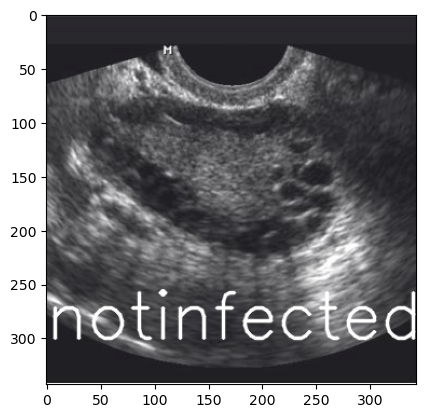

In [164]:
file = '../Hackathon/Ultasonic/data/test/notinfected/img2.png'
check = cv2.imread(file)
check = cv2.cvtColor(img_inf,cv2.COLOR_BGR2RGB)

img = image.load_img(file, target_size=(120, 120))

img = image.img_to_array(img)

img = np.expand_dims(img, axis=0)
img = img/255
r=model.predict_classes(img)
if r==0:
    text='infected'
else:
    text='notinfected'
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(check,text=text,org=(0,300), fontFace=font,fontScale= 2,color=(255,255,255),thickness=2,lineType=cv2.LINE_AA)
plt.imshow(check)